
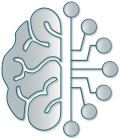

**Environment initialized:** Thursday 05 February 2026, 12:37:20 on insa-12842

In [2]:
# This now triggers vID.init() automatically via __init__.py
import pyphyschemtools as t4pPC
from pyphyschemtools import fg, hl, bg, color
t4pPC.init('t4pPC')
%matplotlib inline

# tools for pyPhysChem

## `Chem3D.py`

### `molView` class

#### Basic use

In [2]:
from pyphyschemtools import molView

t4pPC.centerTitle("Read coordinates from PubChem")
molView(338, source="cid")
t4pPC.centerTitle("Read coordinates from the Protein Data Bank")
molView("1HTB", source="rscb", style='cartoon', w=1000, h=600)
t4pPC.centerTitle("Read coordinates from the Crystallography Open Database")
mv = molView(1000058,'cod',w=600,h=600,supercell=(2,2,2))

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

/home/romuald/Python3/base/lib/python3.11/site-packages/ase/io/cif.py:410: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(136, setting=1). This may result in wrong setting!
  warnings.warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

#### Advanced use



In [3]:
t4pPC.centerTitle("Read coordinates frbbom pubChem and show them in a grid")
import pubchempy as pcp
CIDs = [95417, 98039, 95336]
compounds = ["DBA","DBA5","DBA6"]

titles = []
for i, cid in enumerate(CIDs):
    t4pPC.centertxt(compounds[i])
    c = pcp.Compound.from_cid(cid)
    print("molecular formula = ",c.molecular_formula)
    print("IUPAC name = ",c.iupac_name)
    titles.append(f"{compounds[i]} ({cid})\n{c.iupac_name}")

molView.view_grid(CIDs, n_cols=3, source='cid', style='bs', titles=titles, w=400, detect_BondOrders=True)

molecular formula =  C17H14O
IUPAC name =  1,5-diphenylpenta-1,4-dien-3-one


molecular formula =  C19H16O
IUPAC name =  2,5-dibenzylidenecyclopentan-1-one


molecular formula =  C20H18O
IUPAC name =  2,6-dibenzylidenecyclohexan-1-one


GridspecLayout(children=(VBox(children=(Label(value='DBA (95417)\n1,5-diphenylpenta-1,4-dien-3-one', layout=La…

In [4]:
t4pPC.centerTitle("Calculate and display circumradius of a molecule")
m = molView(338, source="cid", display_now=False)
m.show_bounding_sphere()

Bounding Sphere: Radius = 5.01 Å | Volume = 527.76 Å³


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
t4pPC.centerTitle("Calculate and display a cavity, using the CageCavityCalc library")
m = molView("data_examples/Molecules/betaCD-closed.xyz", display_now=False)
m.show_cage_cavity(grid_spacing=0.4, color='cyan', opacity=0.8)
m.show_bounding_sphere()

Cavity Volume (CageCavityCalc): 168.75 Å³
Dimensions: 7.09 x 7.07 x 5.22 Å
Aspect Ratio (L/W): 1.00


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Bounding Sphere: Radius = 8.35 Å | Volume = 2436.99 Å³


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## `cheminformatics.py`

### `easy_rdkit` class

#### Basic use

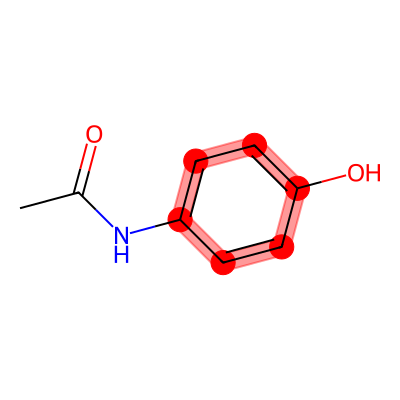

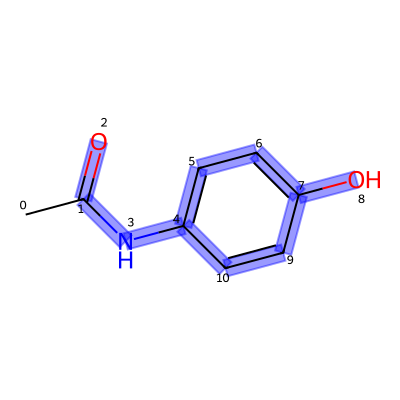

,index atome,symbole,e- valence,e- liants,charge formelle,doublets non-liants (DNL),lacunes ([]),nombre de liaisons,e- total (octet ?),O/H/D ?
0,0,C,4,4,0,0,0,4,8,✅ octet
1,1,C,4,4,0,0,0,4,8,✅ octet
2,2,O,6,2,0,2,0,2,8,✅ octet
3,3,N,5,3,0,1,0,3,8,✅ octet
4,4,C,4,4,0,0,0,4,8,✅ octet
5,5,C,4,4,0,0,0,4,8,✅ octet
6,6,C,4,4,0,0,0,4,8,✅ octet
7,7,C,4,4,0,0,0,4,8,✅ octet
8,8,O,6,2,0,2,0,2,8,✅ octet
9,9,C,4,4,0,0,0,4,8,✅ octet


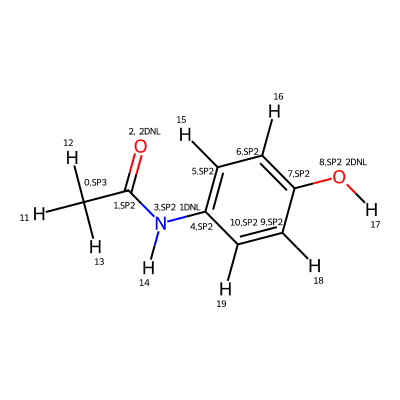

In [18]:
from pyphyschemtools import easy_rdkit

mol = easy_rdkit("CC(=O)NC1=CC=C(C=C1)O")

t4pPC.centerTitle("Aromatic part")
mol.show_mol(plot_aromatic=True)

t4pPC.centerTitle("Conjugated part")
mol.show_mol(plot_conjugation=True, show_n=True)

t4pPC.centerTitle("Lewis & hybridization")
mol.show_mol(show_Lewis=True, show_n=True, show_hybrid=True)


#### Advanced use

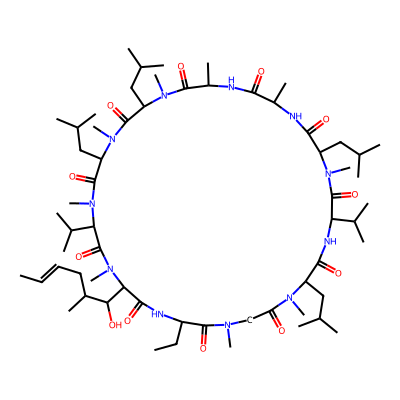

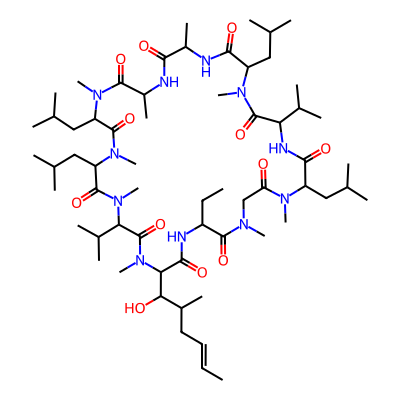

In [19]:
t4pPC.centerTitle("Better representation of macrocycles")
t4pPC.centertxt("without the 'macrocycle' option")
mol = easy_rdkit("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
mol.show_mol()
t4pPC.centertxt("with the 'macrocycle' option")
mol.show_mol(macrocycle=True)

## `kinetics.py`

### `KORD` class, aka Kinetic Order of Reaction Determination

#### Simulation of the theoretical G property values as a function of the order

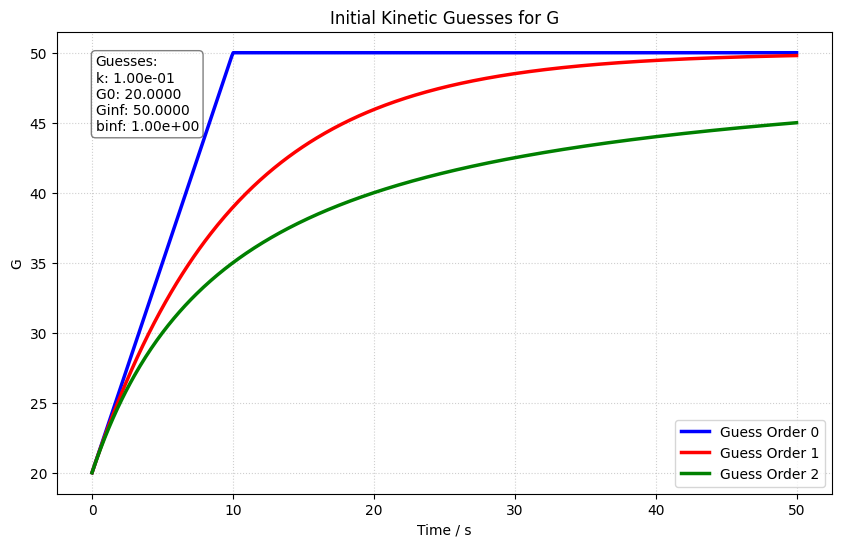

In [1]:
from pyphyschemtools import KORD

simulation = KORD(a0=1, alpha=1, beta=1, k_guess=0.1, G_0_guess=20, G_inf_guess=50, t_simul_max=50)
simulation.simulate_plot()

#### Parameters fitting

Experiments detected: 1
✅ Loaded: A_EXP (Exp 1)
   [Parameters from A_EXP] a0: 3.1000e-05 mol.L-1 | alpha: 1.0 | beta: 1.0



,t,A_EXP
3,0,0.7140
4,3,0.7296
5,6,0.7123
6,9,0.6950
7,12,0.6771
...,...,...
119,348,-0.0268
120,351,-0.0271
121,354,-0.0271
122,357,-0.0273


--- Order 0 ---
  GUESS: k: 2.39e-07 | G0: 0.7140 | Ginf: -0.0275 | binf: 3.100e-05
  OPTIM: k: 4.94e-07 | G0: 0.6898 | Ginf: 0.0025 | binf: 7.377e-05
  ✅ RMSE: 3.19e-02
       R2: 0.98
      AIC: -826.00 (lower is better)
      BIC: -814.82 (more strict on complexity)
--- Order 1 ---
  GUESS: k: 7.69e-03 | G0: 0.7140 | Ginf: -0.0275
  OPTIM: k: 1.17e-02 | G0: 0.7854 | Ginf: -0.0518
  ✅ RMSE: 1.13e-02
       R2: 1.00
      AIC: -1079.19 (lower is better)
      BIC: -1070.80 (more strict on complexity)
--- Order 2 ---
  GUESS: k: 2.48e+02 | G0: 0.7140 | Ginf: -0.0275 | binf: 3.100e-05
  OPTIM: k: 5.95e+02 | G0: 0.8151 | Ginf: -0.2582 | binf: 2.146e-05
  ✅ RMSE: 2.45e-02
       R2: 0.99
      AIC: -889.75 (lower is better)
      BIC: -878.57 (more strict on complexity)
⚠️ File './data_examples/Kinetics/SuiviKin_BIPS_EtOAc.svg' already exists. Overwrite? (y/n): 

 y


💾 Plot saved as: ./data_examples/Kinetics/SuiviKin_BIPS_EtOAc.svg


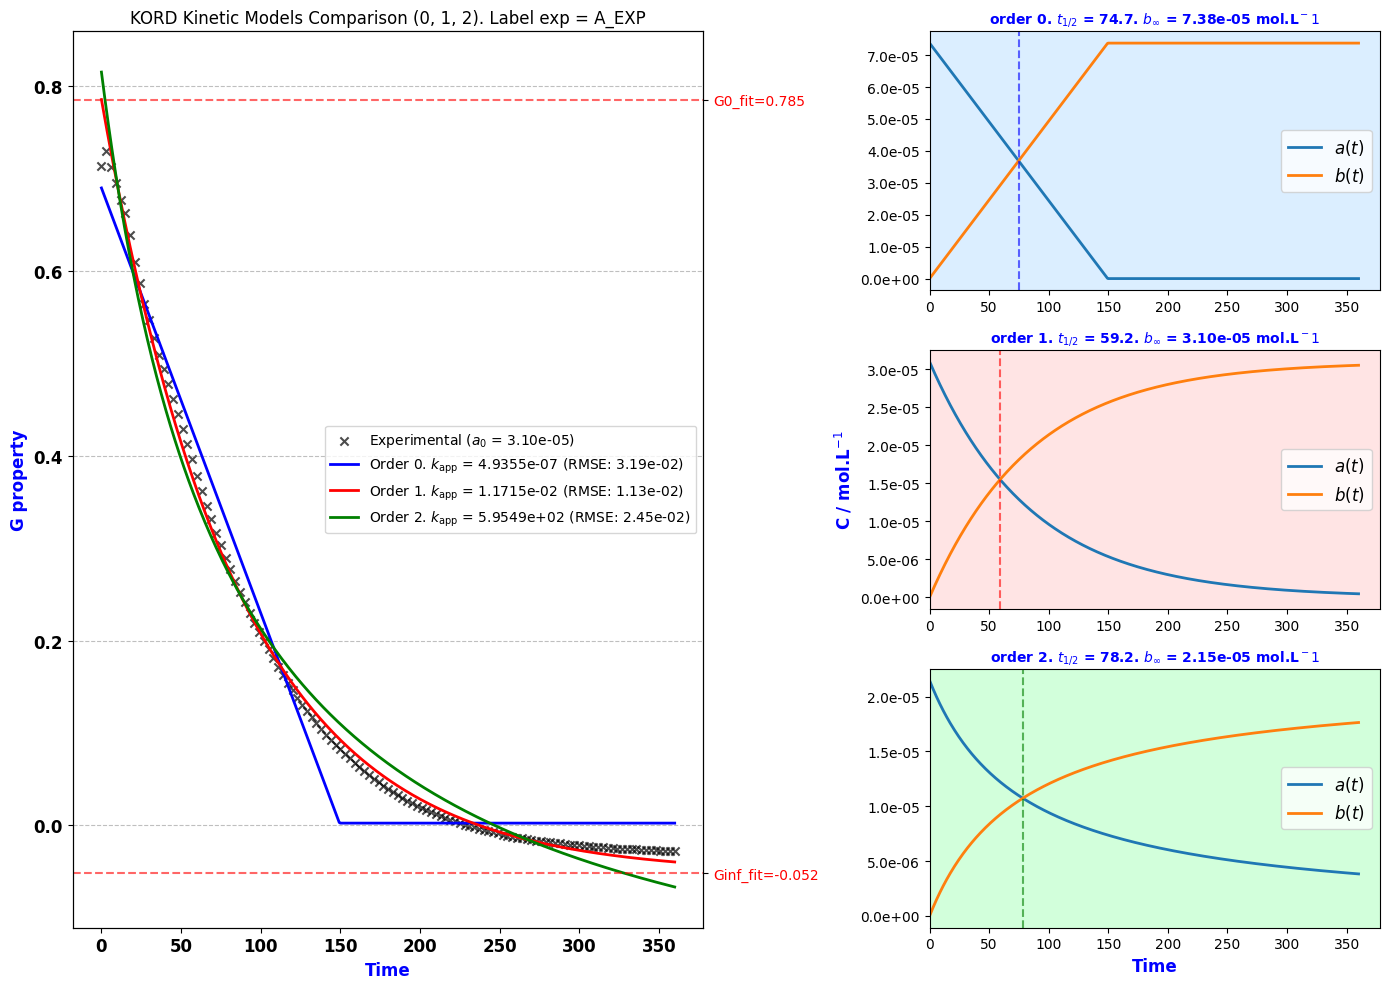

--- KORD CONCLUSION ---
Best model: ORDER 1
Initial concentration a0: 3.100e-05 mol.L-1
alpha: 1.0
beta: 1.0

metrics
RMSE: 0.011
  R2: 0.997

G_exp(t=0): 7.140e-01
G_fit(t=0): 7.854e-01
G_fit(t=inf): -5.184e-02

k_fit: 1.171e-02
t1/2: 59.168
------------------------

--- Final Statistical Verdict ---
Model Selection Confidence: Decisive
ΔBIC (Best [order 1] vs 2nd Best [order 2]): 192.23
--------------------------------


In [1]:
from pyphyschemtools import KORD

# t, G, headers, parameters = KORD.load_from_excel('./data_examples/Kinetics/TestKORD.xlsx', exp_number=1)
# t, G, headers, parameters = KORD.load_from_excel('./data_examples/Kinetics/Example4Kord.xlsx', exp_number=2)
t, G, headers, parameters = KORD.load_from_excel('./data_examples/Kinetics/SuiviKin_BIPS_EtOAc.xlsx', exp_number=1)
study = KORD(t, G, headers, a0=parameters[0], alpha=parameters[1], beta=parameters[2])
study.plot_all_fits("./data_examples/Kinetics/SuiviKin_BIPS_EtOAc.svg")
# study.plot_all_fits()
study.get_best_order()

## `PeriodicTable.py`

### Classe `TableauPeriodique` (for French students)

#### Instanciation d'un tableau périodique et affichage

In [1]:
from pyphyschemtools import TableauPeriodique

tp = TableauPeriodique()
tp.afficher()

Loading BokehJS ...

#### Évolution des propriétés des éléments, périodicité

In [2]:
display(tp.elements)

print(tp.elements.info())

,atomic_number,atomic_radius,block,density,description,dipole_polarizability,electron_affinity,electronic_configuration,evaporation_heat,fusion_heat,...,color,x,y,name_seriesFr,nom,Ei1,y_anumber,y_name,y_prop,display_attribute
0,1,25.0,s,0.000082,"Colourless, odourless gaseous chemical element...",4.50711,0.754195,1s,0.904,0.117,...,#baa2a6,1.0,1.0,Non métal,Hydrogène,13.598435,0.7,1.2,1.35,1.008
1,2,120.0,s,0.000164,"Colourless, odourless gaseous nonmetallic elem...",1.38375,-19.700000,1s2,0.080,NaN,...,#bbbb88,18.0,1.0,Gaz noble,Hélium,24.587389,0.7,1.2,1.35,4.003
2,3,145.0,s,0.534000,Socket silvery metal. First member of group 1 ...,164.11250,0.618049,[He] 2s,148.000,2.890,...,#a6cee3,1.0,2.0,Métal alcalin,Lithium,5.391715,1.7,2.2,2.35,6.940
3,4,105.0,s,1.850000,Grey metallic element of group 2 of the period...,37.74000,-2.400000,[He] 2s2,309.000,12.210,...,#1f78b4,2.0,2.0,Métal alcalino-terreux,Béryllium,9.322699,1.7,2.2,2.35,9.012
4,5,85.0,p,2.340000,An element of group 13 of the periodic table. ...,20.50000,0.279723,[He] 2s2 2p,504.500,23.600,...,#33a02c,13.0,2.0,Métalloïde,Bore,8.298019,1.7,2.2,2.35,10.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,NaN,p,9.928000,NaN,31.00000,NaN,[Rn] 5f14 6d10 7s2 7p2,NaN,NaN,...,#b2df8a,14.0,7.0,Métal pauvre,Flerovium,NaN,6.7,7.2,7.35,289.000
114,115,NaN,p,13.500000,NaN,71.00000,NaN,[Rn] 5f14 6d10 7s2 7p3,NaN,NaN,...,#b2df8a,15.0,7.0,Métal pauvre,Moscovium,NaN,6.7,7.2,7.35,288.000
115,116,NaN,p,12.900000,NaN,NaN,NaN,[Rn] 5f14 6d10 7s2 7p4,NaN,NaN,...,#b2df8a,16.0,7.0,Métal pauvre,Livermorium,NaN,6.7,7.2,7.35,293.000
116,117,NaN,p,7.200000,NaN,76.00000,NaN,[Rn] 5f14 6d10 7s2 7p5,NaN,NaN,...,#fdbf6f,17.0,7.0,Halogène,Tennesse,NaN,6.7,7.2,7.35,294.000


<class 'pandas.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 94 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   atomic_number                              118 non-null    int64  
 1   atomic_radius                              90 non-null     float64
 2   block                                      118 non-null    str    
 3   density                                    118 non-null    float64
 4   description                                109 non-null    str    
 5   dipole_polarizability                      117 non-null    float64
 6   electron_affinity                          77 non-null     float64
 7   electronic_configuration                   118 non-null    str    
 8   evaporation_heat                           88 non-null     float64
 9   fusion_heat                                75 non-null     float64
 10  group_id                             

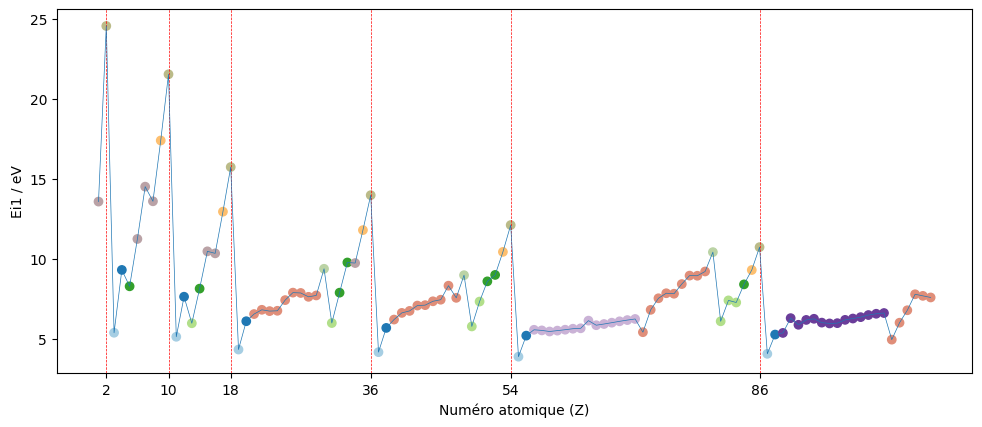

In [4]:
import matplotlib.pyplot as plt 

Z = tp.elements["atomic_number"]
Ei1 = tp.elements["Ei1"]
color = tp.elements["color"]

cm2i = 1/2.54 # conversion de cm en pouces
fig, ax = plt.subplots(figsize=(30*cm2i,12*cm2i))
xticks=[2,10,18,36,54,86,118]
ax.set_xticks(xticks)
plt.grid(color='r', linestyle='--', linewidth=0.5, axis="x")
plt.plot(Z,Ei1,linewidth=0.5)
plt.scatter(Z,Ei1,marker="o",c=color)
plt.xlabel("Numéro atomique (Z)")
plt.ylabel("Ei1 / eV")
plt.show()

In [6]:
t4pPC.end()

**End at:** Monday 02 February 2026, 22:43:35  
**Duration:** 00:00:20 010ms

# End